In [1]:
import networkx as nx
file_path = 'C:/Users/maria/OneDrive/Documentos/CS_Clases/Massive_Graphs/Deliveries/web-Stanford.txt'

# Initialize an empty directed graph
G = nx.DiGraph()

with open(file_path, 'r') as file:
    for line in file:
        # Skip comments and empty lines
        if line.startswith('#') or not line.strip():
            continue

        # Build graph
        source, target = line.strip().split()[:2]
        G.add_edge(source, target)

print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Loaded graph with 281903 nodes and 2312497 edges.


In [2]:
# Basic properties
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed: {G.is_directed()}")


Number of nodes: 281903
Number of edges: 2312497
Is the graph directed: True


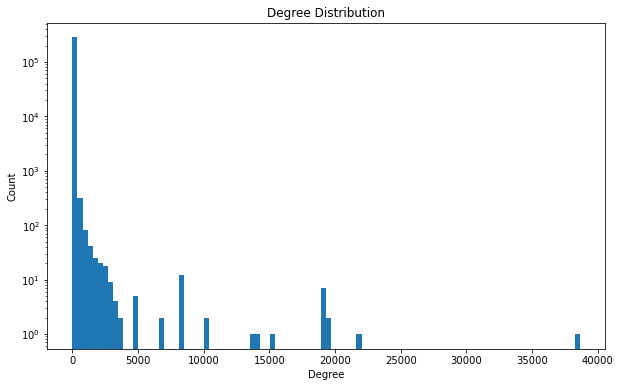

In [3]:
import matplotlib.pyplot as plt

degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, log=True)
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()


In [4]:
# Strongly connected components
strongly_connected_components = nx.strongly_connected_components(G)
largest_scc = max(strongly_connected_components, key=len)
print(f"Number of nodes in the largest strongly connected component: {len(largest_scc)}")

# Weakly connected components
weakly_connected_components = nx.weakly_connected_components(G)
largest_wcc = max(weakly_connected_components, key=len)
print(f"Number of nodes in the largest weakly connected component: {len(largest_wcc)}")


Number of nodes in the largest strongly connected component: 150532
Number of nodes in the largest weakly connected component: 255265


In [5]:
# Compute PageRank for the nodes in the graph
pagerank = nx.pagerank(G, max_iter=100)

# Identify the node with the highest PageRank
max_pagerank_node = max(pagerank, key=pagerank.get)
max_pagerank = pagerank[max_pagerank_node]

print(f"Node with highest PageRank: {max_pagerank_node}, PageRank: {max_pagerank}")


Node with highest PageRank: 89073, PageRank: 0.010006381216752553


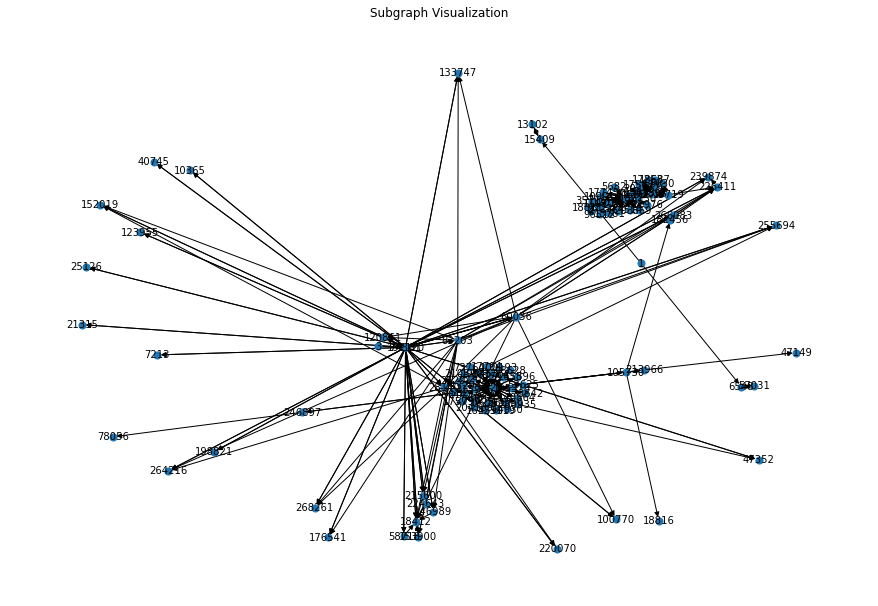

In [6]:
# Visualize a subgraph of the first 100 nodes
subgraph_nodes = list(G.nodes())[:100]
H = G.subgraph(subgraph_nodes)

plt.figure(figsize=(12, 8))
nx.draw(H, with_labels=True, node_size=50, font_size=10)
plt.title("Subgraph Visualization")
plt.show()


# Louvain

In [8]:
import networkx as nx
from networkx.algorithms.community import louvain_communities

# Convert to undirected graph for Louvain method
G_undirected = G.to_undirected()

# Run Louvain community detection
#louvain_communities(G, weight='weight', resolution=1, threshold=1e-07, seed=None)
#  PARAMETERS
#    G - NetworkX graph
#    weight -string or None, optional (default=”weight”) The name of an edge attribute that holds the numerical value used as a weight. If None then each edge has weight 1.
#    resolution - float, optional (default=1) If resolution is less than 1, the algorithm favors larger communities. Greater than 1 favors smaller communities
#    threshold - float, optional (default=0.0000001) Modularity gain threshold for each level. If the gain of modularity between 2 levels of the algorithm is less than the given threshold then the algorithm stops and returns the resulting communities.
#    seed - integer, random_state, or None (default) Indicator of random number generation state. See Randomness.

communities = louvain_communities(G_undirected, resolution=1, threshold=1e-07)
#Returns:list - A list of sets (partition of G). Each set represents one community and contains all the nodes that constitute it.

#To avoid recomputing the communities we will save them in a file and load it for further analysis
# Converting each community to a line of node IDs separated by commas
communities_str = [' '.join(map(str, community)) for community in communities]

# Saving to a file
file_Louvain = 'C:/Users/maria/OneDrive/Documentos/CS_Clases/Massive_Graphs/Deliveries/Louvain-communities.txt'

with open(file_Louvain, 'w') as file:
    file.write('\n'.join(communities_str))
    
communities = []
with open(file_Louvain, 'r') as file:
    for line in file:
        # Converting each line back into a set of integers (node IDs)
        community = set(map(int, line.strip().split()))
        communities.append(community)



In [9]:
communities_sizes = []
# Display the communities
for i, community in enumerate(communities):
    communities_sizes.append(len(community))
    print(f"Community {i}: Size {len(community)}")
    # Print some nodes of the community
    print(f"Nodes: {list(community)[:5]}")  # Show first 5 nodes as an example

Community 0: Size 2671
Nodes: [5, 90117, 196615, 16395, 262157]
Community 1: Size 4
Nodes: [76448, 41825, 180949, 13]
Community 2: Size 111
Nodes: [16, 254483, 15396, 112166, 271915]
Community 3: Size 386
Nodes: [268291, 190468, 24584, 258066, 20]
Community 4: Size 72
Nodes: [244353, 95234, 139522, 61829, 274567]
Community 5: Size 414
Nodes: [225280, 266242, 239629, 196624, 245793]
Community 6: Size 175
Nodes: [11276, 4623, 232978, 95764, 213012]
Community 7: Size 144
Nodes: [67074, 187396, 201221, 81412, 105990]
Community 8: Size 32
Nodes: [240775, 209802, 170515, 113043, 184341]
Community 9: Size 1210
Nodes: [16384, 102401, 104453, 43016, 169994]
Community 10: Size 71
Nodes: [51586, 195970, 161156, 248837, 72964]
Community 11: Size 109
Nodes: [144899, 81414, 37383, 21010, 110104]
Community 12: Size 648
Nodes: [167941, 12295, 204807, 143370, 280588]
Community 13: Size 15
Nodes: [105220, 93545, 19914, 13033, 57130]
Community 14: Size 1298
Nodes: [245762, 163846, 155663, 139280, 221203]

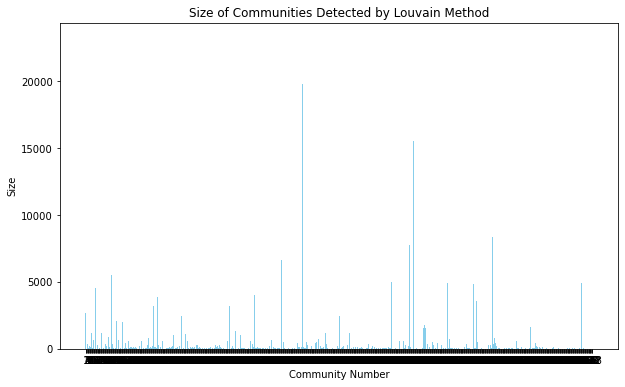

In [10]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(communities_sizes)), communities_sizes, color='skyblue')
plt.xlabel('Community Number')
plt.ylabel('Size')
plt.title('Size of Communities Detected by Louvain Method')
plt.xticks(range(len(communities_sizes)), [f"{i+1}" for i in range(len(communities_sizes))])
plt.show()

Number of Communities 773


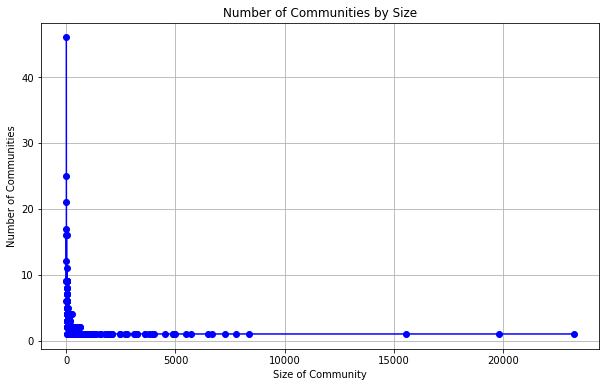

In [11]:
from collections import Counter

print('Number of Communities', len(communities_sizes))

# Counting the number of communities of each size
size_counts = Counter(communities_sizes)

# Sorting the sizes for plotting
sorted_sizes = sorted(size_counts.keys())
counts = [size_counts[size] for size in sorted_sizes]

# Plotting the number of communities by their size
plt.figure(figsize=(10, 6))
plt.plot(sorted_sizes, counts, marker='o', linestyle='-', color='blue')
plt.xlabel('Size of Community')
plt.ylabel('Number of Communities')
plt.title('Number of Communities by Size')
plt.grid(True)
plt.show()

In [15]:
len(size_counts)

297

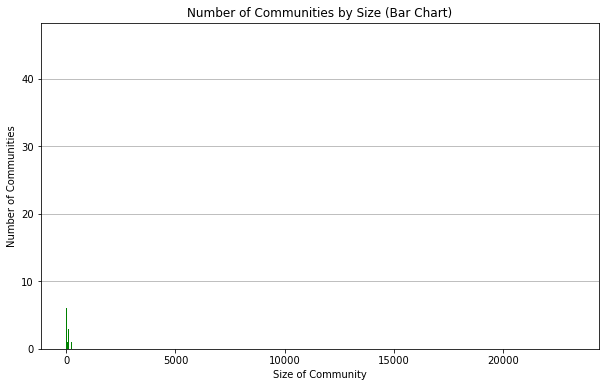

In [13]:
# Plotting the number of communities by their size using a bar chart for clearer visualization
plt.figure(figsize=(10, 6))
plt.bar(sorted_sizes, counts, color='green')
plt.xlabel('Size of Community')
plt.ylabel('Number of Communities')
plt.title('Number of Communities by Size (Bar Chart)')
plt.grid(axis='y')
plt.show()

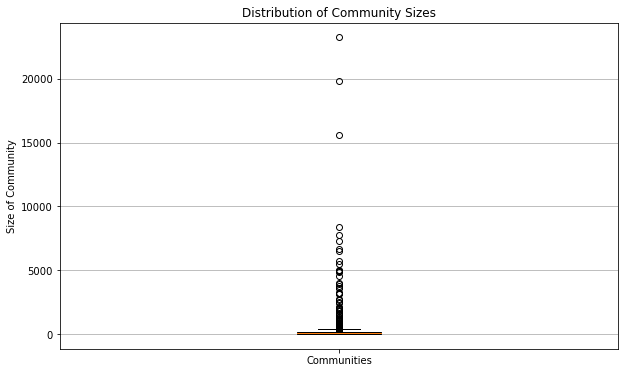

In [14]:
# Generate a box plot for the community sizes
plt.figure(figsize=(10, 6))
plt.boxplot(communities_sizes, vert=True, patch_artist=True)
plt.title('Distribution of Community Sizes')
plt.ylabel('Size of Community')
plt.xticks([1], ['Communities'])  # Only one category, "Communities"
plt.grid(axis='y')
plt.show()